# １章 システムデータの加工・可視化を行う２０本ノック

## ノック１：法人情報データを読み込んでみよう

In [1]:
# ファイルの読み込み
import pandas as pd
data = pd.read_csv('data/22_shizuoka_all_20210331.csv', encoding='shift-jis')

In [2]:
data.head(1)

,1,1000013040008,01,1.1,2018-04-02,2015-10-05,静岡家庭裁判所,Unnamed: 7,101,静岡県,...,Unnamed: 20,Unnamed: 21,2015-10-05.1,1.2,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",Unnamed: 27,シズオカカテイサイバンショ,0
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0


読み込んだデータはヘッダーが無く、先頭のデータ行がヘッダーに自動で設定されている。

In [3]:
len(data)

114612

In [4]:
# ヘッダー無し指定で再度読み込み
data = pd.read_csv('data/22_shizuoka_all_20210331.csv', encoding='shift-jis', header=None)

In [5]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,1,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0


In [6]:
len(data)

114613

## ノック２：読み込んだデータを確認しよう

In [7]:
data.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='int64')

In [8]:
len(data.columns)

30

In [9]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,1,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0


In [10]:
# データ型の確認(データ型は自動で振り分けられるため、意図しない型が無いか要確認)
data.dtypes

0       int64
1       int64
2       int64
3       int64
4      object
5      object
6      object
7     float64
8       int64
9      object
10     object
11     object
12    float64
13      int64
14      int64
15    float64
16    float64
17    float64
18     object
19    float64
20    float64
21     object
22     object
23      int64
24     object
25     object
26     object
27    float64
28     object
29      int64
dtype: object

今回はすべて文字列型で読み込ませるように変更する

In [11]:
# 文字列型で読み込むように指定
data = pd.read_csv('data/22_shizuoka_all_20210331.csv', encoding='shift-jis', header=None, dtype=object)

In [12]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0


In [13]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
dtype: object

## ノック３：ヘッダ用のテキストファイルを読み込もう

In [14]:
mst = pd.read_csv('data/mst_column_name.txt', encoding='shift-jis')
mst.head()

,column_id\tcolumn_name_ja\tcolumn_name_en
0,1\t一連番号\tsequenceNumber
1,2\t法人番号\tcorporateNumber
2,3\t処理区分\tprocess
3,4\t訂正区分\tcorrect
4,5\t更新年月日\tupdateDate


In [15]:
# データがタブで区切られているため、タブ区切りでファイル読み込み ('\t'はタブを意味する)
mst = pd.read_csv('data/mst_column_name.txt', encoding='shift-jis', sep='\t')
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


In [16]:
len(mst)

30

In [17]:
# あてがうdataのコラム数と一致するかを確認
len(mst) == len(data.columns)

True

## ノック４：ヘッダ行を追加しよう

In [18]:
# mstから抽出
columns = mst["column_name_en"].values

In [19]:
columns

array(['sequenceNumber', 'corporateNumber', 'process', 'correct',
       'updateDate', 'changeDate', 'name', 'nameImageId', 'kind',
       'prefectureName', 'cityName', 'streetNumber', 'addressImageId',
       'prefectureCode', 'cityCode', 'postCode', 'addressOutside',
       'addressOutsideImageId', 'closeDate', 'closeCause',
       'successorCorporateNumber', 'changeCause', 'assignmentDate',
       'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji'], dtype=object)

In [20]:
data.columns = columns
data.head(2)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0


## ノック５：統計量や欠損値を確認しよう

In [21]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,114613,9700150101659,01,0,2015-11-13,2015-10-05,八幡神社,00080249,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


In [22]:
# 欠損値の有無を確認
data.isna()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114608,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114609,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114610,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114611,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False


In [23]:
# .sum()メソッドで確認
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113370
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113418
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114613
addressOutsideImageId       114613
closeDate                   104536
closeCause                  104536
successorCorporateNumber    113947
changeCause                 113502
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114613
furigana            

欠損値が各列に存在することに注意しながら加工していく

## ノック６：データの追加（繰り返し・読込・抽出・結合）

In [24]:
# フォルダの確認
import os
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv',
 'output']

今回追加したい差分データはdiffで始まるファイル

In [25]:
# 指定したファイルの存在確認
from glob import glob
diff_files = glob('data/diff*.csv')
diff_files

['data\\diff_20210401.csv',
 'data\\diff_20210405.csv',
 'data\\diff_20210406.csv',
 'data\\diff_20210407.csv',
 'data\\diff_20210408.csv',
 'data\\diff_20210409.csv']

In [26]:
# まずは、1つめのファイルを読み込み
diff_files.sort()  # 中身を昇順ソートする
diff = pd.read_csv(diff_files[0], encoding='shift-jis', header=None, dtype=object) # 1つめのファイルのみを指定
print(len(diff))
diff.head(3)

2316


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0


In [27]:
# 静岡県のデータに絞り込んでみる
diff.columns = columns
diff = diff.loc[diff['prefectureName'] == '静岡県']
print(len(diff))
diff.head(3)

43


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0


In [28]:
# データ結合結果
data_test = data                          # テスト用の変数にdataの中身を参照コピー
print(len(data_test))                     # 既存の件数を確認
print(len(data_test) == len(data))        # 既存の件数が正しいことを確認
print(len(diff))                          # 差分の件数を確認
data_test = pd.concat([data_test, diff])  # テスト用の変数に差分データを追加
print(len(data_test))                     # 追加後の件数を確認
data_test.tail(3)                         # 追加後のデータの末尾3件を確認

114613
True
43
114656


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
2159,2160,9080401024929,01,0,2021-04-01,2021-04-01,株式会社リガーレ,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,リガーレ,0
2160,2161,9080402007726,01,1,2021-04-01,2015-10-05,有限会社丸信商店,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,マルシンショウテン,0
2161,2162,9080402021917,21,0,2021-04-01,2021-03-30,有限会社岡本商会,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,オカモトショウカイ,0


In [29]:
# 差分データをすべて読み込んでみる
for f in diff_files:
  diff = pd.read_csv(f, encoding='shift-jis', header=None, dtype=object)
  diff.columns = columns
  diff = diff.loc[diff['prefectureName'] == '静岡県']
  data_test = pd.concat([data_test, diff])
data.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0


In [30]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,114613,9700150101659,01,0,2015-11-13,2015-10-05,八幡神社,00080249,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


sequenceNumber と corporateNumber の count, unique が一致していない。  
corporateNumber に重複がないか確認する。

In [31]:
print(data[data["corporateNumber"].duplicated()])

Empty DataFrame
Columns: [sequenceNumber, corporateNumber, process, correct, updateDate, changeDate, name, nameImageId, kind, prefectureName, cityName, streetNumber, addressImageId, prefectureCode, cityCode, postCode, addressOutside, addressOutsideImageId, closeDate, closeCause, successorCorporateNumber, changeCause, assignmentDate, latest, enName, enPrefectureName, enCityName, enAddressOutside, furigana, hihyoji]
Index: []

[0 rows x 30 columns]


確認したところ、重複は無かった事が分かった。

In [32]:
# 重複データを削除（下に結合した新しい方を残す）
data.drop_duplicates(subset='corporateNumber', keep='last', inplace=True)

In [33]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,114613,9700150101659,01,0,2015-11-13,2015-10-05,八幡神社,00080249,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


In [34]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113370
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113418
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114613
addressOutsideImageId       114613
closeDate                   104536
closeCause                  104536
successorCorporateNumber    113947
changeCause                 113502
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114613
furigana            

## ノック７：マスタを読み込んで項目を横に繋げよう

In [35]:
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv',
 'output']

In [36]:
mst_process_kbn = pd.read_csv('data/mst_process_kbn.csv', dtype=object)
mst_process_kbn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


コードと名称を保持している事を確認した

In [37]:
# 結合を行う
data = data.merge(mst_process_kbn, on='process', how='left')

In [38]:
print(len(data.columns))
data.head(3)

31


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規


In [39]:
mst_correct_kbn = pd.read_csv('data/mst_correct_kbn.csv', encoding='shift-jis', dtype=object)
mst_correct_kbn

,correct,correct_kbn_name
0,0,訂正以外
1,1,訂正


In [40]:
# 結合を行う
data = data.merge(mst_correct_kbn, on='correct', how='left')
print(len(data.columns))
data.head(3)

32


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正


In [41]:
mst_corp_kind = pd.read_csv('data/mst_corp_kind.csv', dtype=object)
mst_corp_kind

,kind,corp_kind_name
0,101,国の機関
1,201,地方公共団体
2,301,株式会社
3,302,有限会社
4,303,合名会社
5,304,合資会社
6,305,合同会社
7,399,その他の設立登記法人
8,401,外国会社等
9,499,その他


In [42]:
# 結合を行う
data = data.merge(mst_corp_kind, on='kind', how='left')
print(len(data.columns))
data.head(3)

33


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関


In [43]:
mst_close_cause = pd.read_csv('data/mst_closeCause.csv', dtype=object)
mst_close_cause

,closeCause,closeCause_name
0,01,清算の結了等
1,11,合併による解散等
2,21,登記官による閉鎖
3,31,その他の清算の結了等


In [44]:
# 結合を行う
data = data.merge(mst_close_cause, on='closeCause', how='left')
print(len(data.columns))
data.head(3)

34


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN


In [45]:
mst_latest = pd.read_csv('data/mst_latest.csv', dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


In [46]:
# 結合を行う
data = data.merge(mst_latest, on='latest', how='left')
print(len(data.columns))
data.head(3)

35


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報


In [47]:
mst_hihyoji = pd.read_csv('data/mst_hihyoji.csv', dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


In [48]:
# 結合を行う
data = data.merge(mst_hihyoji, on='hihyoji', how='left')
print(len(data.columns))
data.head(3)

36


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象


## ノック８：テキストの連結や分割をしよう

In [49]:
# 結合前に欠損値の有無を確認。欠損値があると結合結果も欠損値になるため。
data[['prefectureName', 'cityName', 'streetNumber']].isna().sum()

prefectureName     0
cityName           0
streetNumber      17
dtype: int64

In [50]:
# 試しに、欠損値があるまま結合してみる
data['address'] = data['prefectureName'] + data['cityName'] + data['streetNumber']
print(len(data.columns))
data.head(3)

37


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


In [51]:
data.loc[data['streetNumber'].isna()].head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3908,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
16656,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
20888,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN


address に欠損値があることがわかった

In [52]:
# 欠損値を処理しつつ結合を行う
data.loc[data['streetNumber'].isna(), 'address'] = data['prefectureName'] + data['cityName']

In [53]:
print(data['address'].isna().sum())
data.loc[data['streetNumber'].isna()].head(3)

0


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3908,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
16656,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
20888,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県伊東市


欠損値が処理できたことが分かった

In [54]:
data.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


In [55]:
# テキストの先頭から3文字を抽出
data['postCode_head'] = data['postCode'].str[:3]
print(len(data.columns))
data.head(3)

38


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430


In [56]:
# テキストの後ろから4文字を抽出
data['postCode_tail'] = data['postCode'].str[-4:]
print(len(data.columns))
data.head(3)

39


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929


## ノック９：日付を加工しよう

In [57]:
data.columns

Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail'],
      dtype='object')

In [58]:
# 日付加工用にデータ型を変更する
tmp = pd.to_datetime(data['closeDate'])
tmp.dtypes

dtype('<M8[ns]')

In [59]:
# まとめて型変換
dt_columns = ['updateDate', 'changeDate', 'closeDate', 'assignmentDate']
for col in dt_columns:
  data[col] = pd.to_datetime(data[col])

In [60]:
data.dtypes

sequenceNumber                      object
corporateNumber                     object
process                             object
correct                             object
updateDate                  datetime64[ns]
changeDate                  datetime64[ns]
name                                object
nameImageId                         object
kind                                object
prefectureName                      object
cityName                            object
streetNumber                        object
addressImageId                      object
prefectureCode                      object
cityCode                            object
postCode                            object
addressOutside                      object
addressOutsideImageId               object
closeDate                   datetime64[ns]
closeCause                          object
successorCorporateNumber            object
changeCause                         object
assignmentDate              datetime64[ns]
latest     

In [61]:
# 日付計算を行う
data['corporate_life'] = data['closeDate'] - data['assignmentDate']
print(len(data.columns))
data.head(3)

40


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT


欠損値がありCorporate_lifeが NaT となっている

In [62]:
# NaTとなっているデータを確認。.notna()メソッドで抽出。
tmp = data.loc[data['closeDate'].notna()]
print(len(tmp))
tmp.head(3)

10077


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
32,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1947 days
37,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1858 days
38,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡小山町須走４９３番地,410,1431,884 days


In [63]:
# 閉鎖コードの項目と閉鎖日の項目の欠損値でないデータを比較して確認
len(data.loc[data['closeCause'].notna()]) == len(data.loc[data['closeDate'].notna()])

True

In [64]:
# 年月の設定
data['update_YM'] = data['updateDate'].dt.to_period('M')
print(len(data.columns))
data.head(2)

41


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04


In [65]:
# 同様に処理
dt_prefixes = ['assignment', 'change', 'update', 'close']
for pre in dt_prefixes:
  data[f'{pre}_YM'] = data[f'{pre}Date'].dt.to_period('M')

In [66]:
print(len(data.columns))
data.head(3)

44


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04,2015-10,2015-10,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04,2015-10,2015-10,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04,2015-10,2015-10,NaT


In [67]:
data.dtypes

sequenceNumber                       object
corporateNumber                      object
process                              object
correct                              object
updateDate                   datetime64[ns]
changeDate                   datetime64[ns]
name                                 object
nameImageId                          object
kind                                 object
prefectureName                       object
cityName                             object
streetNumber                         object
addressImageId                       object
prefectureCode                       object
cityCode                             object
postCode                             object
addressOutside                       object
addressOutsideImageId                object
closeDate                    datetime64[ns]
closeCause                           object
successorCorporateNumber             object
changeCause                          object
assignmentDate               dat

## ノック１０：年度を設定しよう

In [68]:
# 対象を更新日付に絞り、更新年度を設定する
data['update_year'] = pd.DatetimeIndex(data['updateDate']).year         # 更新日付から年を取得
data['update_month'] = pd.DatetimeIndex(data['updateDate']).month       # 更新日付から月を取得
data['update_fiscal_year'] = pd.DatetimeIndex(data['updateDate']).year  # 更新年度に取得した年を設定
data.loc[data['update_month'] < 4, 'update_fiscal_year'] -= 1           # 更新月が3月までは更新年度-1

In [69]:
print(len(data.columns))
data.head(3)

47


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [70]:
# 年度設定の正当性確認
## 更新月が1月から12月のデータを1件ずつ表示
for i in range(12):
  display(data[['update_YM', 'update_fiscal_year']].loc[data['update_month'] == i+1 ][:1])

,update_YM,update_fiscal_year
45,2019-01,2018


,update_YM,update_fiscal_year
32,2021-02,2020


,update_YM,update_fiscal_year
30,2021-03,2020


,update_YM,update_fiscal_year
0,2018-04,2018


,update_YM,update_fiscal_year
47,2017-05,2017


,update_YM,update_fiscal_year
34,2018-06,2018


,update_YM,update_fiscal_year
57,2018-07,2018


,update_YM,update_fiscal_year
29,2018-08,2018


,update_YM,update_fiscal_year
5,2020-09,2020


,update_YM,update_fiscal_year
42,2019-10,2019


,update_YM,update_fiscal_year
27,2015-11,2015


,update_YM,update_fiscal_year
28,2017-12,2017


## ノック１１：加工したデータをファイルに出力しよう

In [71]:
output_dir = 'data/output'
os.makedirs(output_dir, exist_ok=True)

In [72]:
output_file = 'processed_shizuoka.csv'
data.to_csv(os.path.join(output_dir, output_file), index=False)

In [74]:
output_file = output_file.replace('.csv', '.xlsx')
data.to_excel(os.path.join(output_dir, output_file), index=False)

## ノック１２：不要な項目の削除と並べ替えをしよう

In [75]:
print(len(data.columns))
print(data.columns)
data.head(3)

47
Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail',
       'corporate_life', 'update_YM', 'assignment_YM', 'change_YM', 'close_YM',
       'update_year', 'update_month', 'update_fiscal_year'],
      dtype='object')


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [76]:
# 項目の削除と並び替え
data = data[['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process', 'process_kbn_name', 'assignmentDate', 'updateDate', 'update_fiscal_year', 'update_YM']]

In [77]:
print(len(data.columns))
print(data.columns)
data.head(3)

10
Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04


In [78]:
data = data.drop(columns = 'process')
print(data.columns)
data.head(3)

Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04


## ノック１３：まとまった単位で集計しよう


In [79]:
# 法人種別ごとの件数
tmp = data.groupby('corp_kind_name').size()
tmp

corp_kind_name
その他             498
その他の設立登記法人    14332
合同会社           3554
合名会社            244
合資会社           1668
国の機関             16
地方公共団体          192
有限会社          42880
株式会社          51229
dtype: int64

In [80]:
# 並び替え
tmp.sort_values(inplace=True, ascending=False)
tmp

corp_kind_name
株式会社          51229
有限会社          42880
その他の設立登記法人    14332
合同会社           3554
合資会社           1668
その他             498
合名会社            244
地方公共団体          192
国の機関             16
dtype: int64

In [81]:
# 更新年度でグループ化
tmp = data.groupby('update_fiscal_year').size()
tmp

update_fiscal_year
2015    57833
2016     4379
2017     4044
2018    20959
2019    14996
2020    12402
dtype: int64

In [82]:
# 複数項目
tmp = data.groupby(['update_fiscal_year', 'corp_kind_name']).size()
tmp

update_fiscal_year  corp_kind_name
2015                その他の設立登記法人         6606
                    合同会社                891
                    合名会社                200
                    合資会社               1481
                    有限会社              30700
                    株式会社              17955
2016                その他                   3
                    その他の設立登記法人          275
                    合同会社                311
                    合名会社                  5
                    合資会社                 27
                    有限会社               1419
                    株式会社               2339
2017                その他の設立登記法人          246
                    合同会社                352
                    合名会社                  4
                    合資会社                 21
                    有限会社               1249
                    株式会社               2172
2018                その他                 429
                    その他の設立登記法人         4259
                    合同会社                6

In [83]:
# ピボットテーブル
pt_data = pd.pivot_table(data, index='corp_kind_name', columns='update_fiscal_year', aggfunc='size')
pt_data

update_fiscal_year,2015,2016,2017,2018,2019,2020
corp_kind_name,,,,,,
その他,NaN,3.0,NaN,429.0,28.0,38.0
その他の設立登記法人,6606.0,275.0,246.0,4259.0,1760.0,1186.0
合同会社,891.0,311.0,352.0,617.0,635.0,748.0
合名会社,200.0,5.0,4.0,19.0,9.0,7.0
合資会社,1481.0,27.0,21.0,58.0,47.0,34.0
国の機関,NaN,NaN,NaN,16.0,NaN,NaN
地方公共団体,NaN,NaN,NaN,64.0,NaN,128.0
有限会社,30700.0,1419.0,1249.0,3475.0,3063.0,2974.0
株式会社,17955.0,2339.0,2172.0,12022.0,9454.0,7287.0


## ノック１４：市区町村別の法人数を可視化しよう

In [84]:
tmp = data.groupby('cityName').size()
tmp.head()

cityName
三島市      3590
下田市       930
伊東市      3255
伊豆の国市    1443
伊豆市      1162
dtype: int64

<BarContainer object of 46 artists>

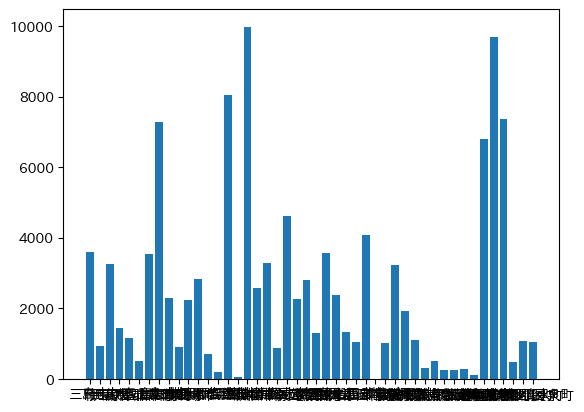

In [85]:
import matplotlib.pyplot as plt
import matplotlib_fontja

x = tmp.index
y = tmp.values
plt.bar(x, y)

<BarContainer object of 46 artists>

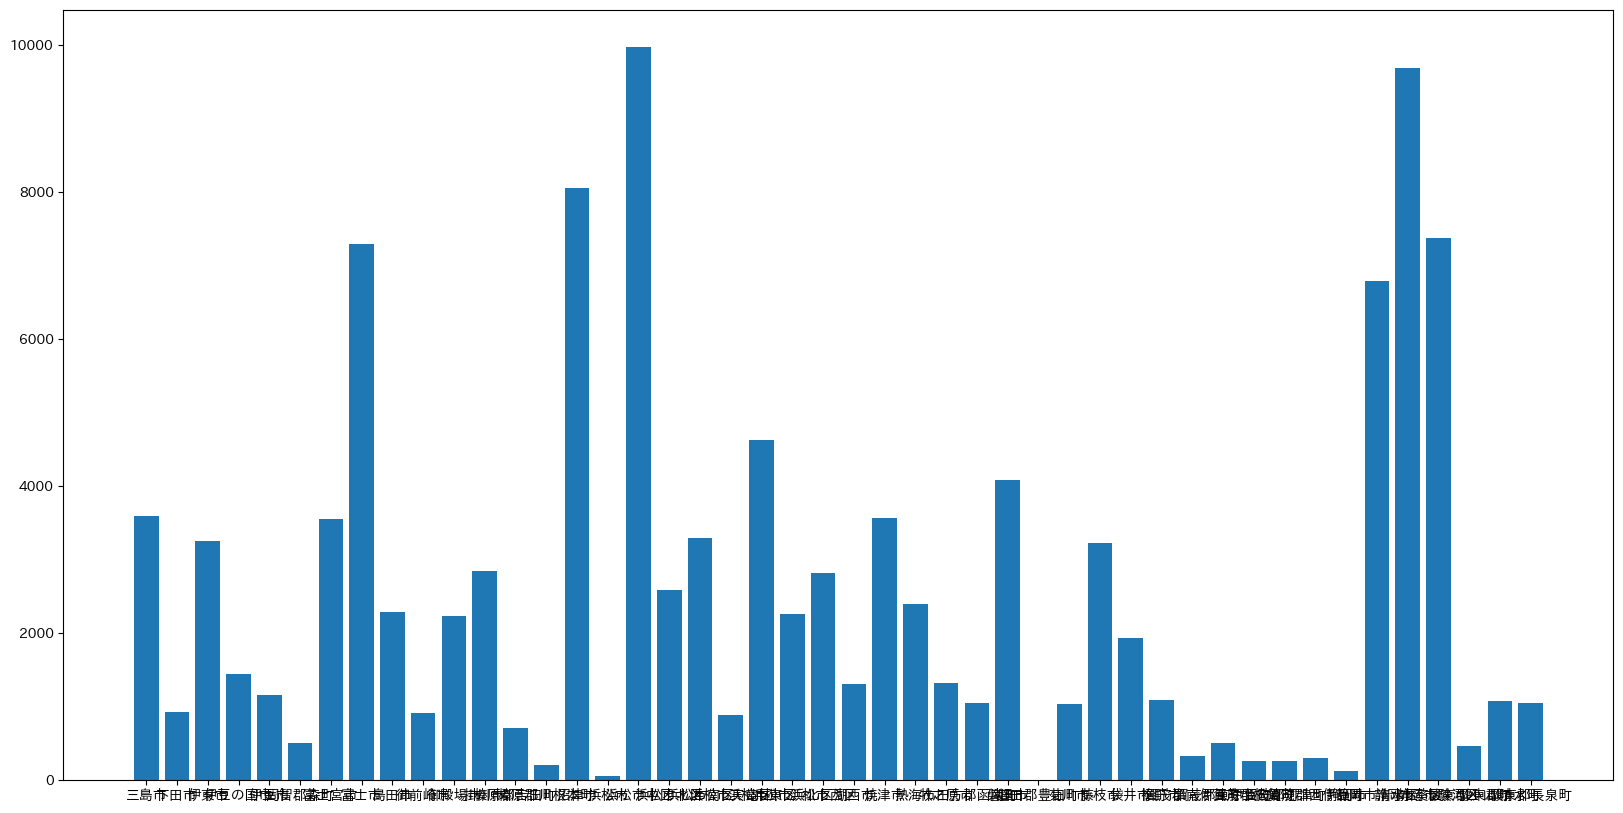

In [86]:
# サイズ調整
plt.figure(figsize=(20, 10))
plt.bar(x, y)

## ノック１５：グラフの縦横と表示順を変えてみよう

In [87]:
tmp.sort_values(inplace=True, ascending=True)
tmp

cityName
磐田郡豊田町        3
浜松市          47
静岡市         121
榛原郡川根本町     200
賀茂郡松崎町      253
賀茂郡河津町      264
賀茂郡西伊豆町     295
賀茂郡南伊豆町     323
駿東郡小山町      468
賀茂郡東伊豆町     497
周智郡森町       498
榛原郡吉田町      707
浜松市天竜区      887
御前崎市        912
下田市         930
菊川市        1027
駿東郡長泉町     1042
田方郡函南町     1046
駿東郡清水町     1072
裾野市        1092
伊豆市        1162
湖西市        1311
牧之原市       1323
伊豆の国市      1443
袋井市        1937
御殿場市       2228
浜松市浜北区     2264
島田市        2285
熱海市        2389
浜松市北区      2582
浜松市西区      2811
掛川市        2840
藤枝市        3230
伊東市        3255
浜松市南区      3296
富士宮市       3549
焼津市        3567
三島市        3590
磐田市        4077
浜松市東区      4621
静岡市清水区     6793
富士市        7288
静岡市駿河区     7375
沼津市        8050
静岡市葵区      9685
浜松市中区      9978
dtype: int64

<BarContainer object of 46 artists>

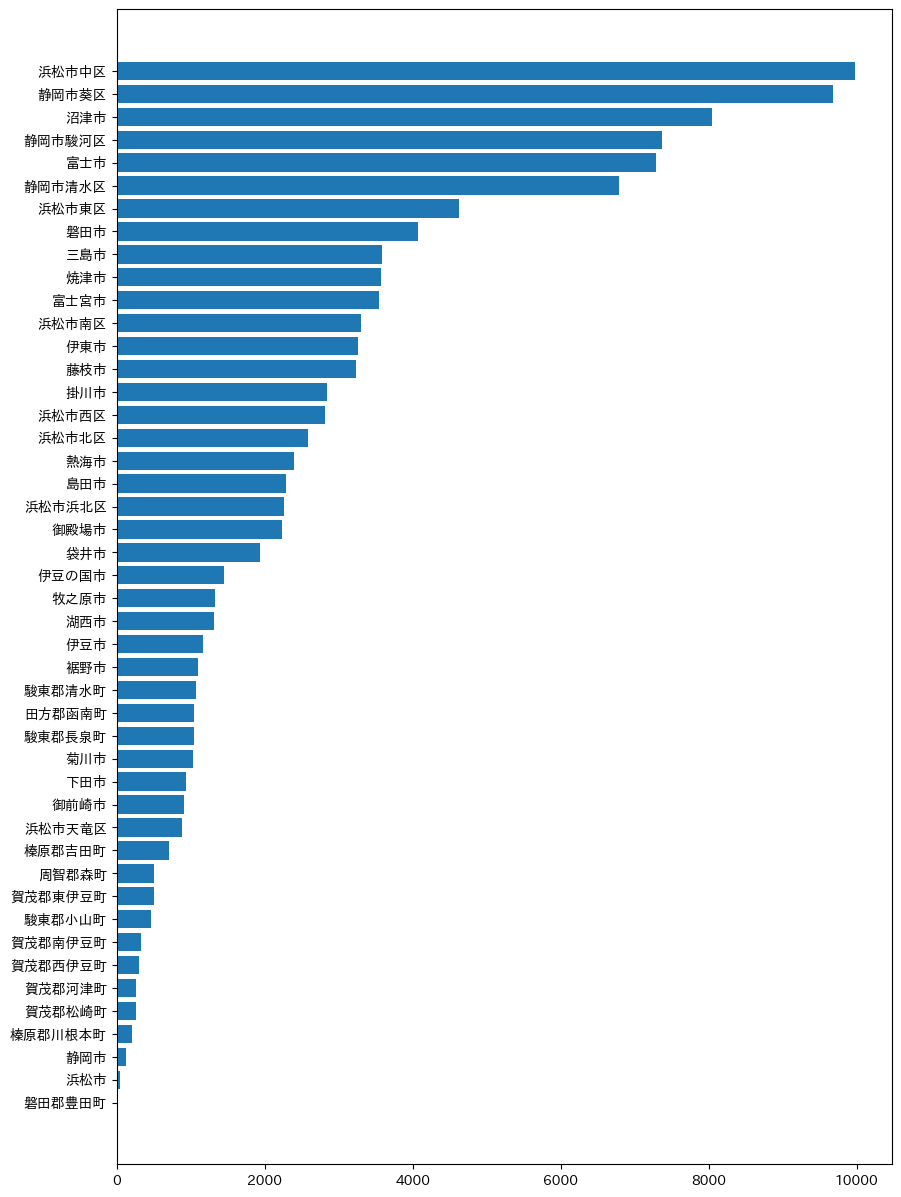

In [88]:
plt.figure(figsize=(10, 15))
x = tmp.index
y = tmp.values
plt.barh(x, y)

## ノック１６：グラフのタイトルとラベルを設定しよう

<BarContainer object of 10 artists>

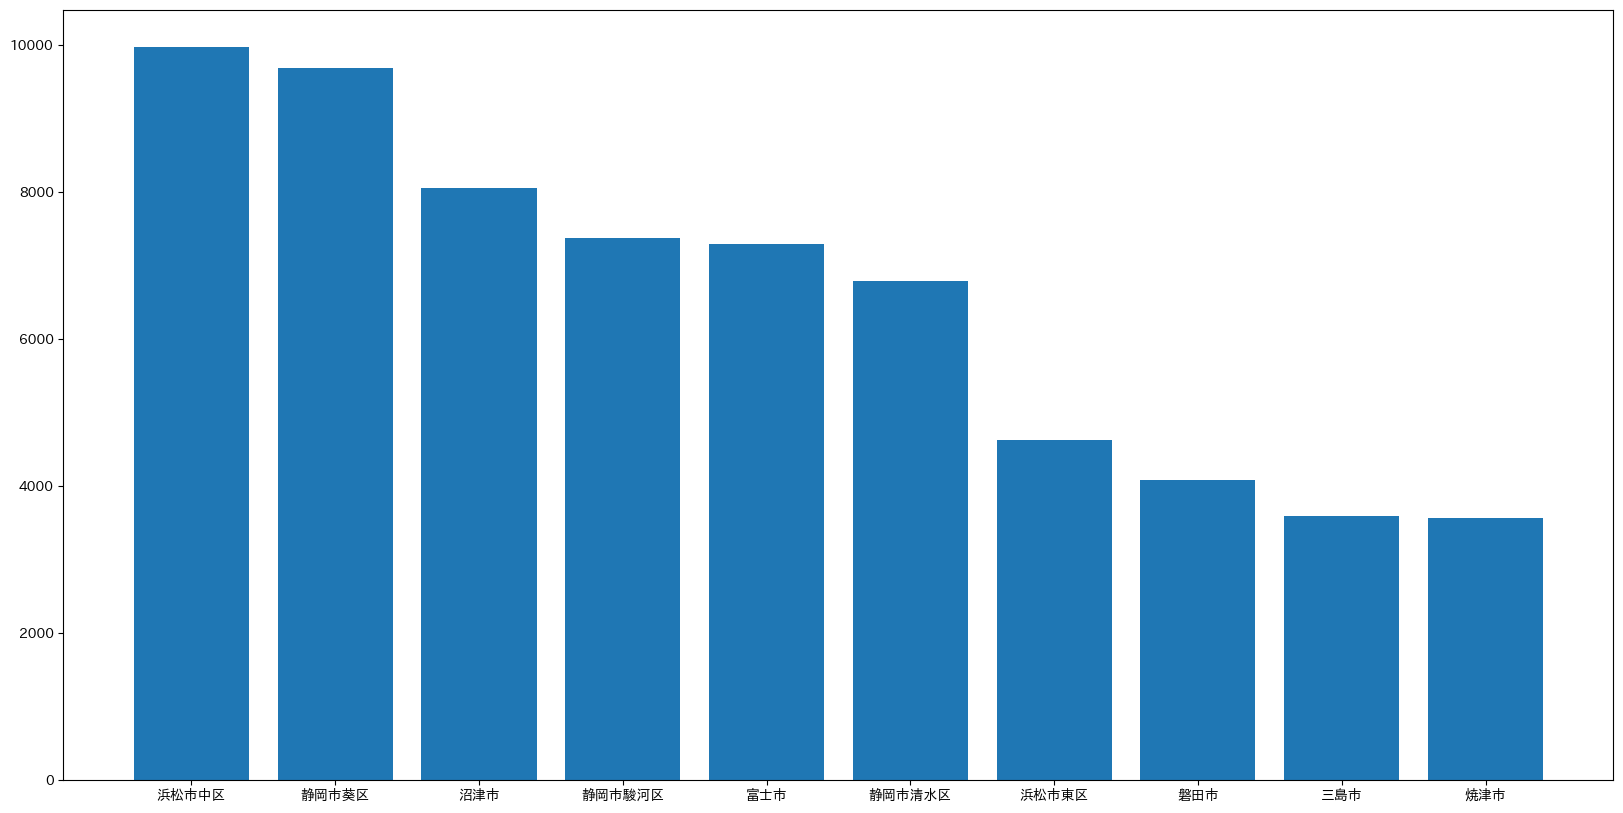

In [89]:
tmp.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(20, 10))
x = tmp[:10].index
y = tmp[:10].values
plt.bar(x, y)


Text(0, 0.5, '法人数')

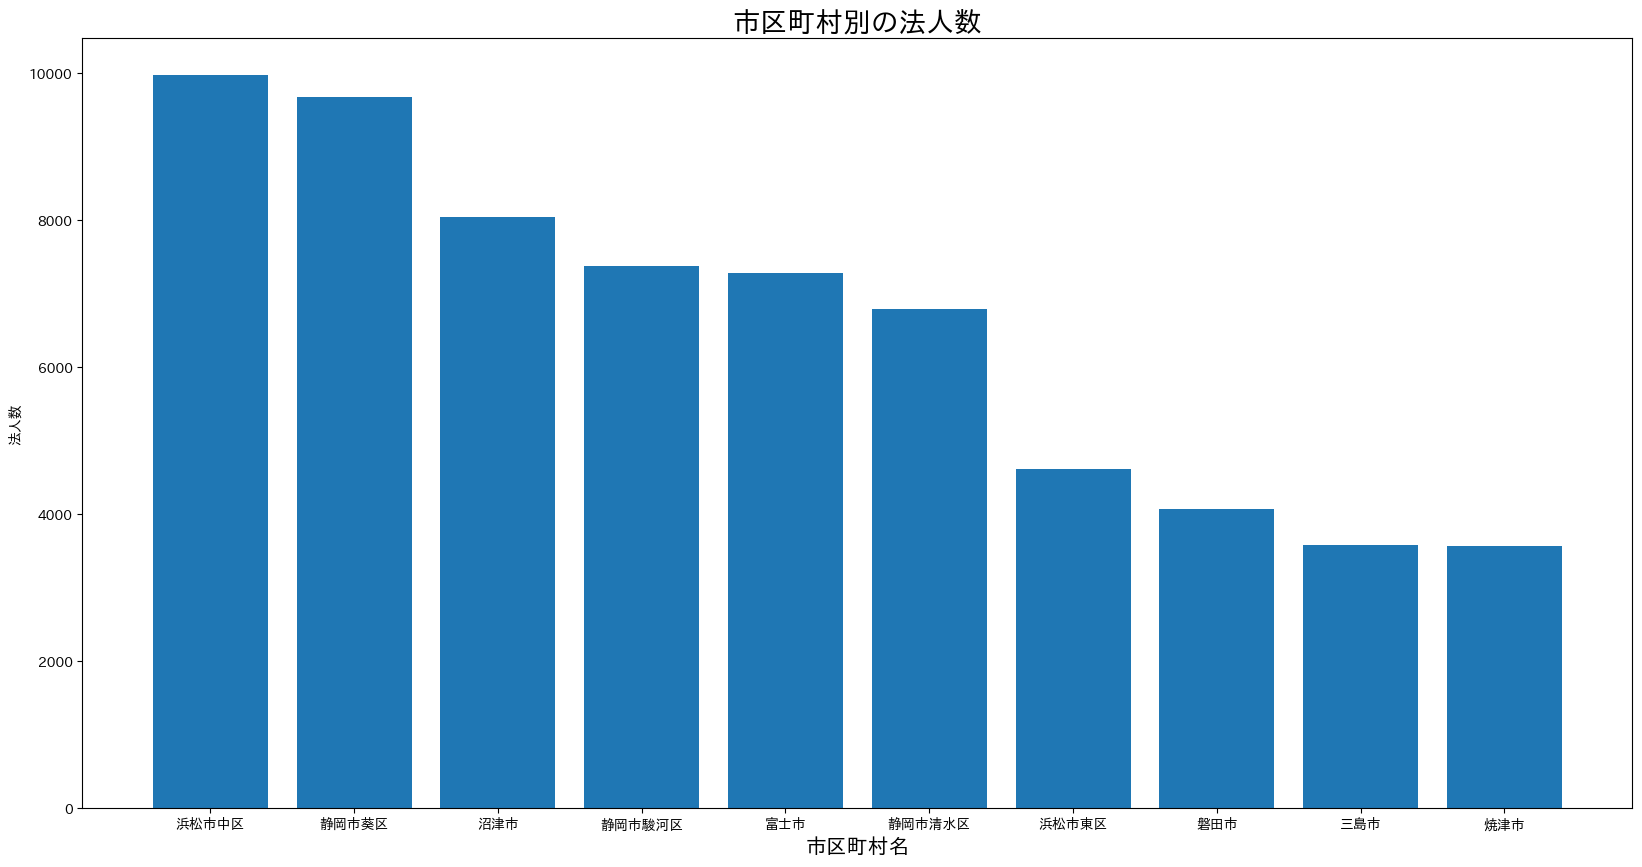

In [90]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.title('市区町村別の法人数', fontsize=20)
plt.xlabel('市区町村名', fontsize=15)
plt.ylabel('法人数')


## ノック１７：グラフの見た目をもっと変えてみよう

Text(7.5, 9000, '上位10の自治体を抜粋して表示')

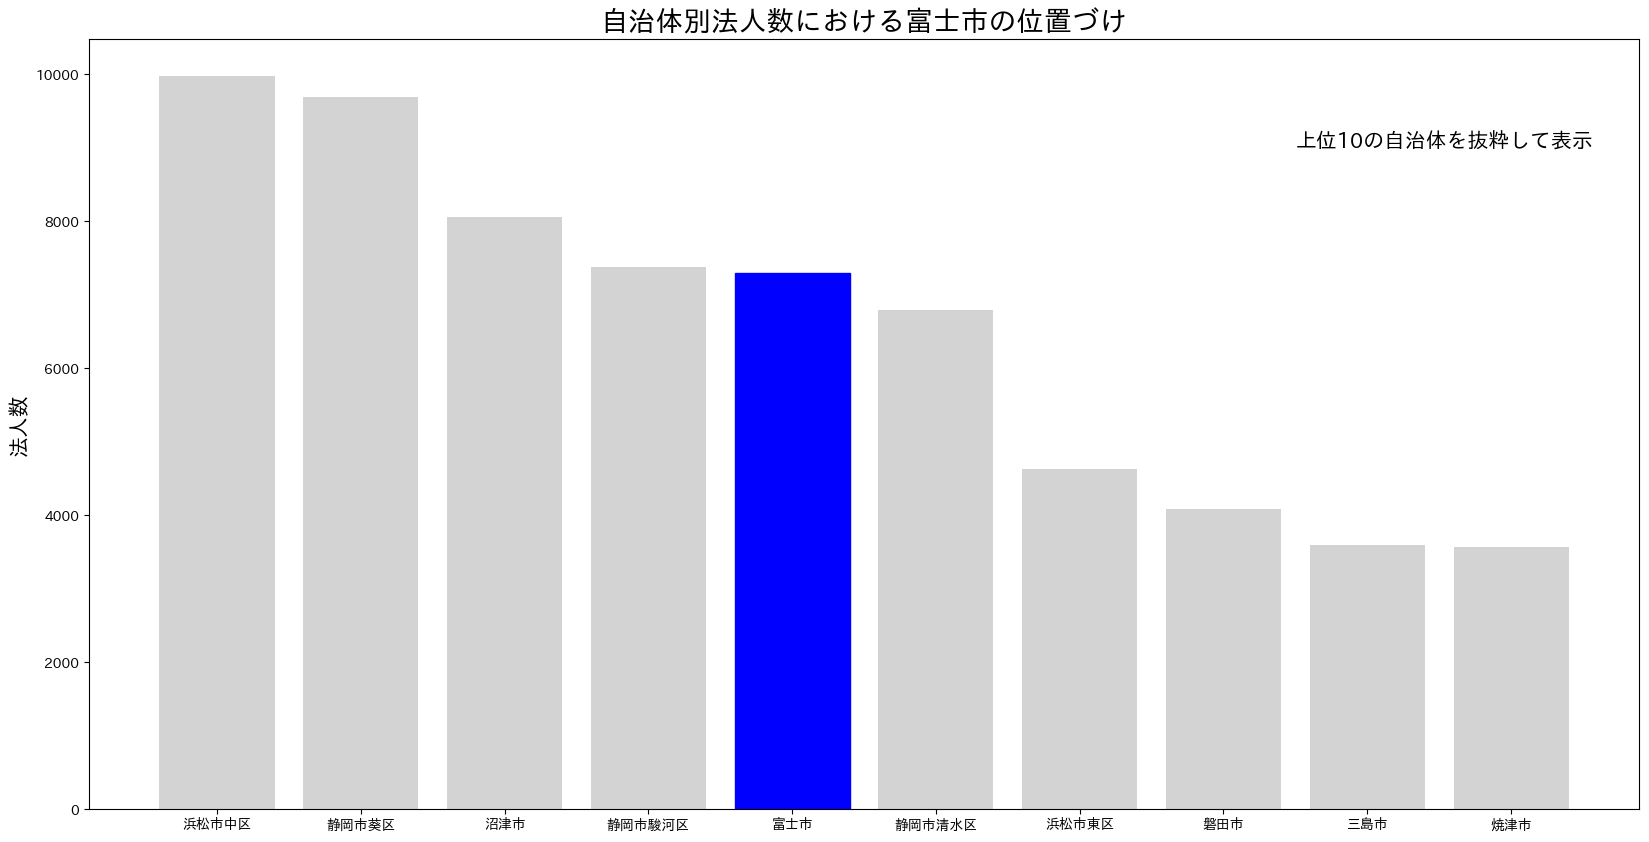

In [94]:
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
fig, ax = plt.subplots(figsize=(20, 10))
bar_list = ax.bar(x, y, color='lightgray')
bar_list[4].set_color('blue')
ax.set_title('自治体別法人数における富士市の位置づけ', fontsize=20);
ax.set_ylabel('法人数', fontsize=15)
ax.text(7.5, 9000, '上位10の自治体を抜粋して表示', fontsize=15)

## ノック１８：９０日以内に新規登録された法人数を可視化してみよう

In [97]:
# 現在日時を取得
base_time = pd.Timestamp.now(tz='Asia/Tokyo')
base_time

Timestamp('2024-10-24 21:14:19.554814+0900', tz='Asia/Tokyo')

In [98]:
print(len(data))
data.head()

114613


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04


In [99]:
data['assignmentDate'] = data['assignmentDate'].dt.tz_localize('Asia/Tokyo')
data.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04


In [107]:
delta = pd.Timedelta(365*5, 'days') # ざっくり5年以内
tmp = data.loc[(data['process_kbn_name'] == '新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

3077


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
1887,焼津市,1080001023198,株式会社ＭｙＳｔａｒ,株式会社,新規,2019-11-08 00:00:00+09:00,2019-11-13,2019,2019-11
1888,牧之原市,1080001023207,池田屋麦酒株式会社,株式会社,新規,2019-11-11 00:00:00+09:00,2019-11-14,2019,2019-11
1889,静岡市駿河区,1080001023215,株式会社ＥＳエンタープライズ,株式会社,新規,2019-11-13 00:00:00+09:00,2019-11-18,2019,2019-11
1890,静岡市葵区,1080001023223,株式会社駿秀工業,株式会社,新規,2019-11-25 00:00:00+09:00,2019-11-28,2019,2019-11
1892,静岡市葵区,1080001023272,東昇ペイント株式会社,株式会社,新規,2019-12-26 00:00:00+09:00,2020-01-06,2019,2020-01


<BarContainer object of 10 artists>

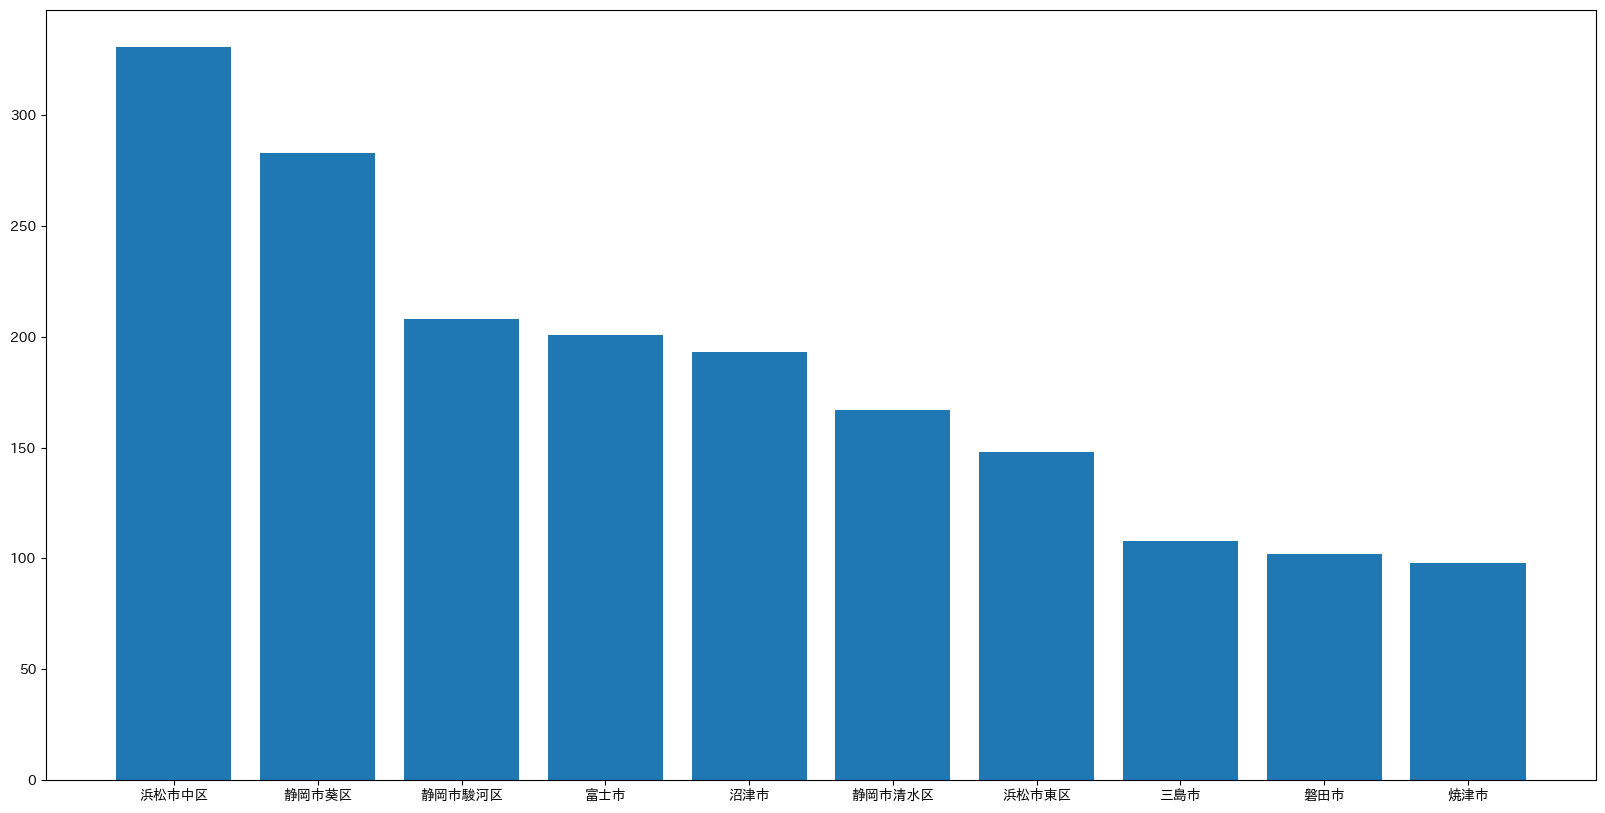

In [108]:
tmp = tmp.groupby('cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

In [110]:
# 日付指定の場合
base_time = pd.Timestamp('2020-04-16', tz='Asia/Tokyo')
tmp = data.loc[(data['process_kbn_name'] == '新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

94126


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04


<BarContainer object of 10 artists>

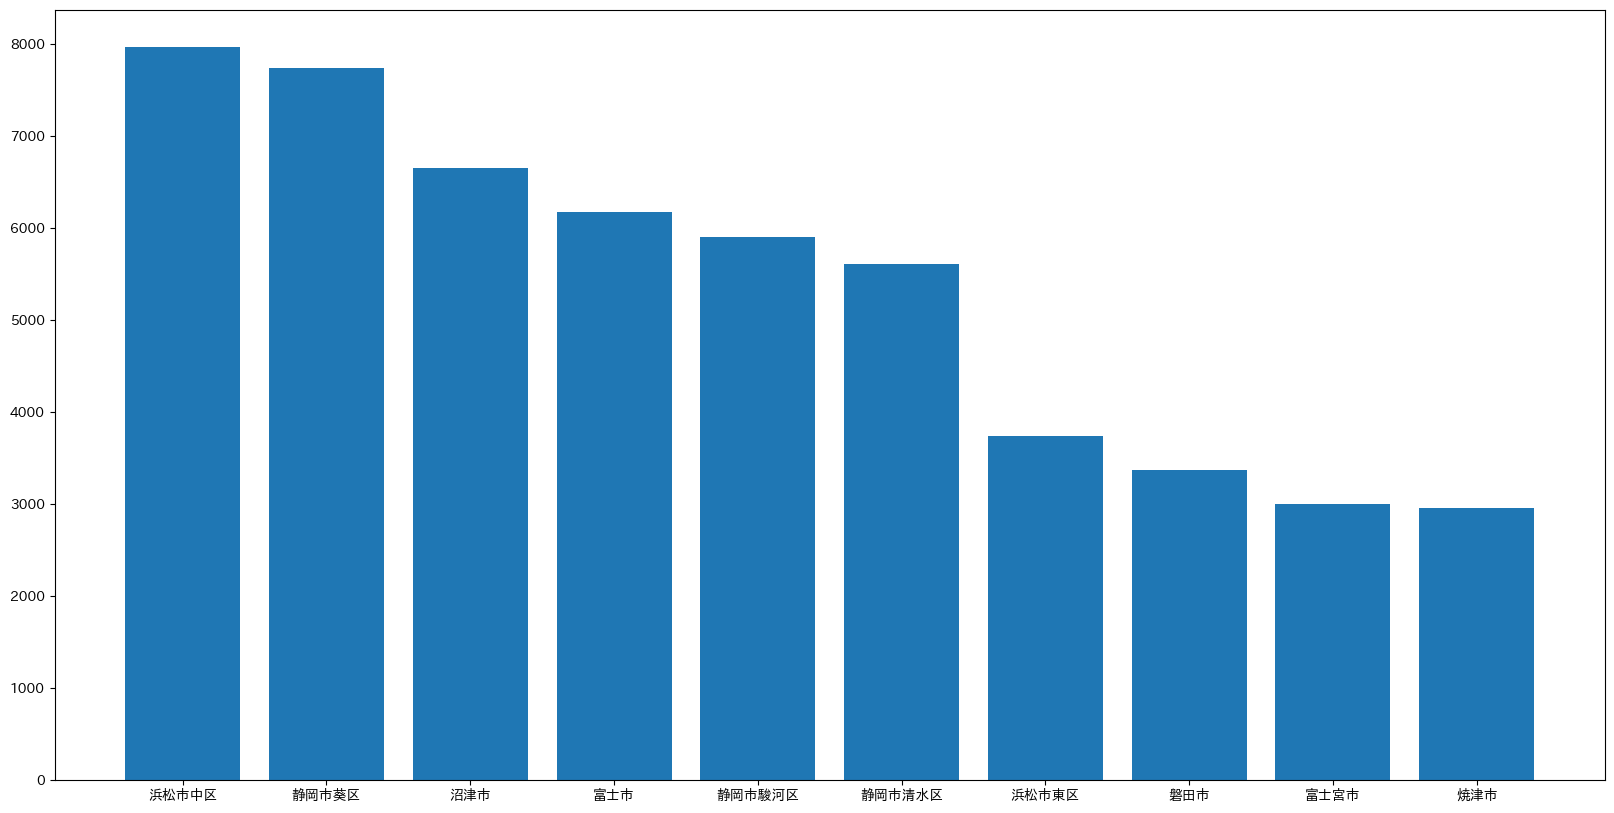

In [111]:
tmp = tmp.groupby(by='cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

## ノック１９：年度別の推移を可視化しよう

In [112]:
tmp = data.dropna(subset=['cityName'])
tmp = tmp.loc[tmp['cityName'].str.match('^.*区$')]
print(len(tmp))
tmp.head()

50292


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
15,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
29,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08


In [113]:
tmp = tmp.loc[(tmp['update_fiscal_year'] >= 2016) & (tmp['update_fiscal_year'] < 2021)]
print(len(tmp))
tmp.head()

26405


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
15,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
29,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08


In [114]:
tmp = tmp.groupby(['cityName', 'update_fiscal_year']).size()
tmp.name = 'count'
tmp = tmp.reset_index()
print(len(tmp))
tmp.head(6)

50


,cityName,update_fiscal_year,count
0,浜松市中区,2016,745
1,浜松市中区,2017,365
2,浜松市中区,2018,1891
3,浜松市中区,2019,1303
4,浜松市中区,2020,1137
5,浜松市北区,2016,96


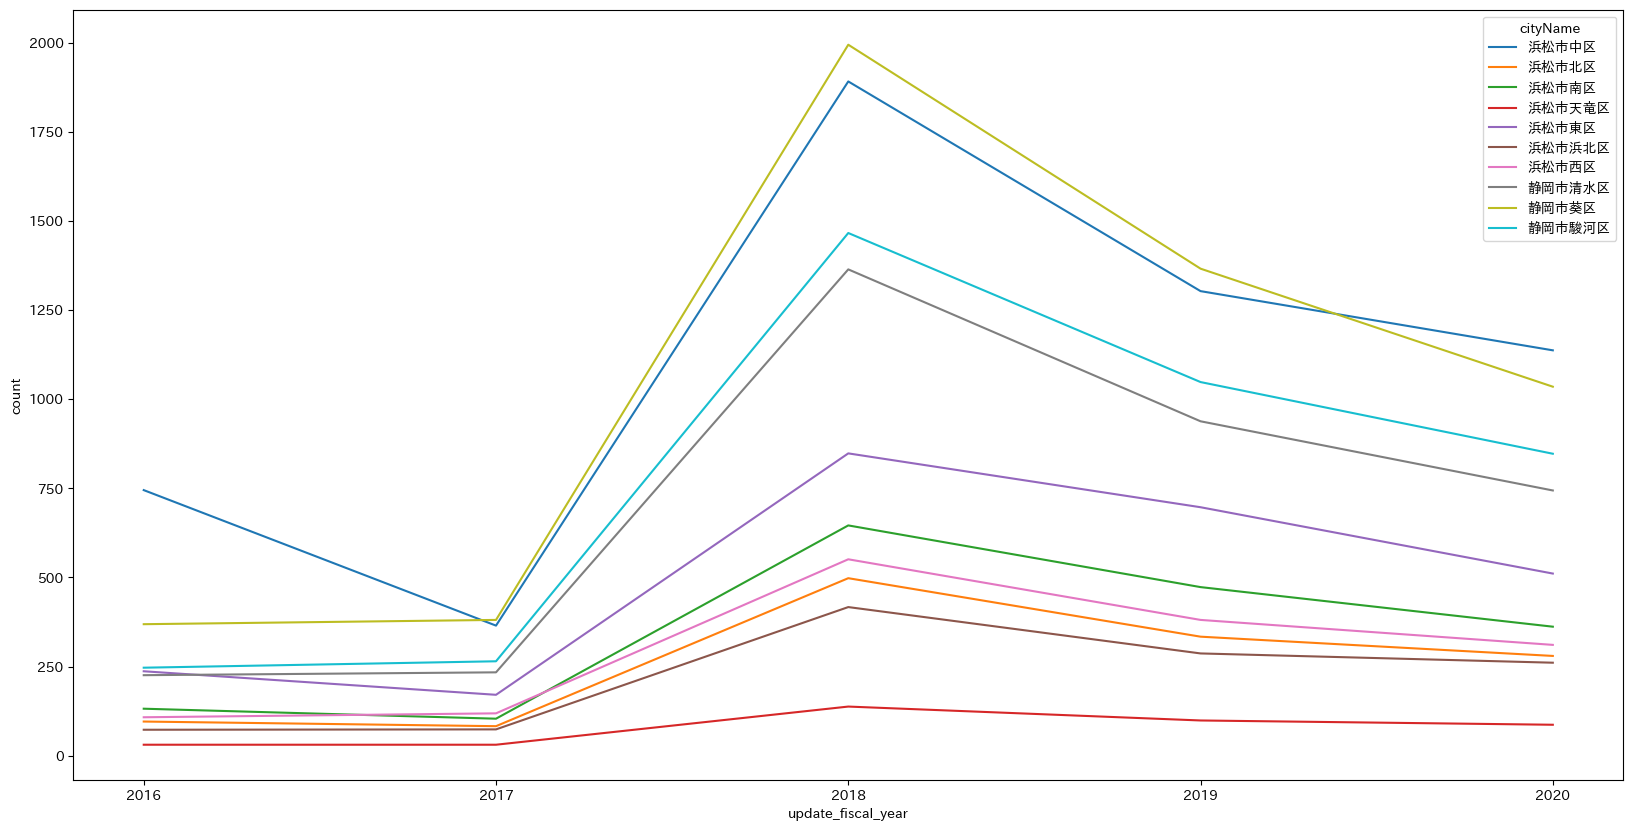

In [117]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20, 10))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 軸の目盛設定
img = sns.lineplot(x=tmp['update_fiscal_year'], y=tmp['count'], hue=tmp['cityName'])

## ノック２０：データとグラフを出力しよう

In [118]:
data_file = 'knock20_graphdata.csv'
data.to_csv(os.path.join(output_dir, data_file), index=False)

In [119]:
graph_file = 'knock20_graph.png'
fig = img.get_figure()
fig.savefig(os.path.join(output_dir, graph_file))